In [11]:
import pandas as pd
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

The dataset is already divided into train and test data, so I will put it back together for further analysis

In [12]:
survey_train = pd.read_csv("W:\Python/Project_2/train.csv")
survey_test = pd.read_csv("W:\Python/Project_2/test.csv")
survey_test.shape , survey_train.shape

((25976, 25), (103904, 25))

In [13]:
df = pd.concat([survey_train, survey_test])
df.shape

(129880, 25)

In [14]:
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied


The datasets are succesfully merged. Now I can start the initial Exploritory Data Analysis and data cleaning 

In [15]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

There are two columns - Unnamed: 0 and id, which I don´t need. Plus, the last column - satisfaction doesn´t start with capital "S".

In [16]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
df.rename(columns={'satisfaction': 'Satisfaction'}, inplace=True) 
df.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied


In [17]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


There are quite a big diffrences between mean and max values in three columns - Flight Distance, Departure Delay and Arrival Delay. There is a chance of outliers.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [19]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3821
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
Satisfaction                            2
dtype: int64

In [20]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Satisfaction                           0
dtype: int64

The column Arrival delas is the only column with missing value. The amount of missing values is not statisticaly significant(393 out of 129.880) so I could simply drop the rows with missing values, but for further practise I will use Scikit Learn to fill the missing values. I will use median because the column has a large max value which disproportionately increased the mean value. But to be sure I will use boxplot to visualize the data composition. 

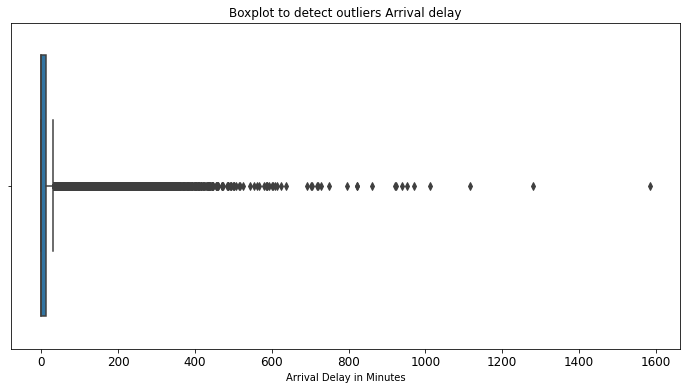

In [21]:
plt.figure(figsize=(12,6))
plt.title('Boxplot to detect outliers Arrival delay', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df["Arrival Delay in Minutes"])
plt.show()

As you can see on the box plot there are some outliers

In [23]:
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
df["Arrival Delay in Minutes"] = imp_median.fit_transform(df[["Arrival Delay in Minutes"]])
# Important! to have double [[]] to make 2D array
df["Arrival Delay in Minutes"].isna().sum()

0

In [24]:
df.duplicated().sum()

0

Dataset in clear from dulicates

The box plot will help with detecting the outliers

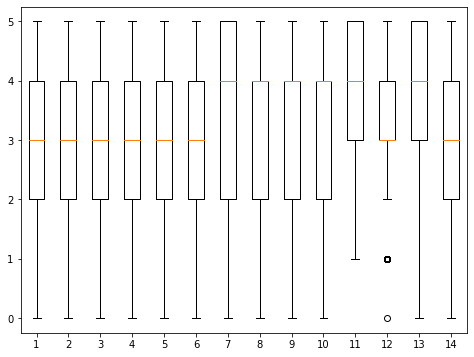

In [25]:
plt.figure(figsize=(8,6))
plt.boxplot(df[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']])
plt.show()

In [26]:
df["Checkin service"].value_counts()

4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: Checkin service, dtype: int64

In [27]:
df.drop(df[df["Checkin service"]==0].index,inplace=True)
df["Checkin service"].value_counts()

4    36333
3    35452
5    25883
1    16108
2    16102
Name: Checkin service, dtype: int64

Plotting the data

Text(0.5, 1.0, 'Customers Age')

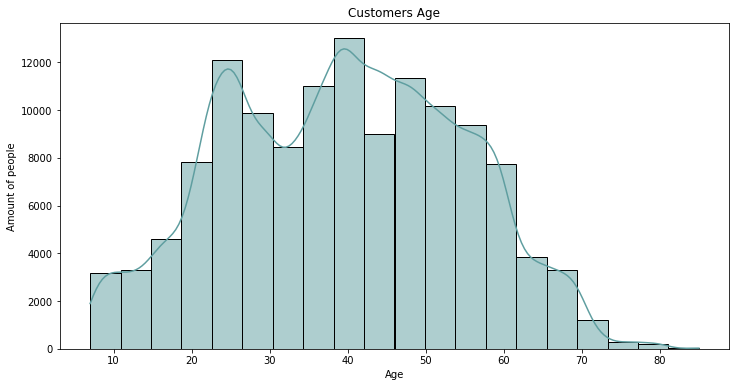

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df["Age"], color="cadetblue", kde=True, bins=20)
plt.xlabel("Age")
plt.ylabel("Amount of people")
plt.title("Customers Age")

Text(0.5, 1.0, 'Flight Distance')

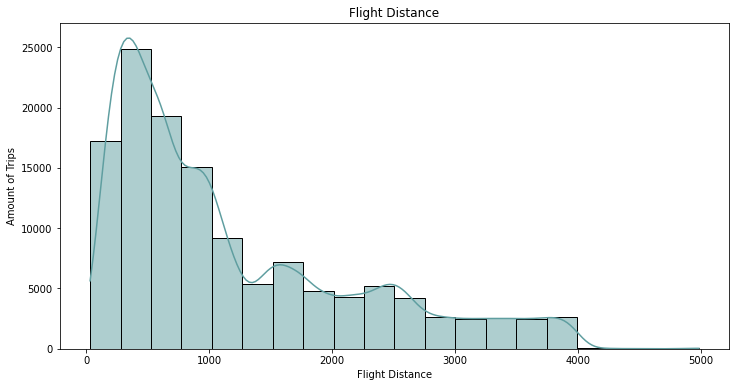

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df["Flight Distance"], color="cadetblue", kde=True, bins=20)
label=df["Flight Distance"]
plt.xlabel("Flight Distance")
plt.ylabel("Amount of Trips")
plt.title("Flight Distance")

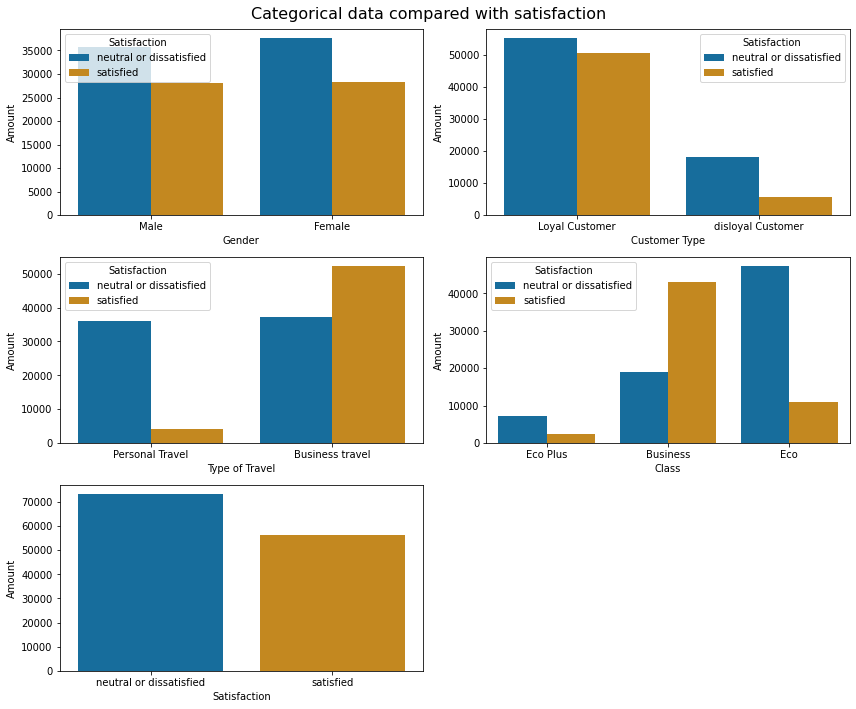

In [58]:
plt.figure(figsize=(12,10))
plt.suptitle('Categorical data compared with satisfaction', fontsize=16)

plt.subplot(321)
sns.countplot(data=df, x='Gender', hue='Satisfaction', palette="colorblind")
plt.xlabel('Gender')
plt.ylabel('Amount')

plt.subplot(322)
sns.countplot(data=df, x='Customer Type', hue='Satisfaction', palette="colorblind")
plt.xlabel('Customer Type')
plt.ylabel('Amount')

plt.subplot(323)
sns.countplot(data=df, x='Type of Travel', hue='Satisfaction', palette="colorblind")
plt.xlabel('Type of Travel')
plt.ylabel('Amount')

plt.subplot(324)
sns.countplot(data=df, x='Class', hue='Satisfaction', palette="colorblind")
plt.xlabel('Class')
plt.ylabel('Amount')

plt.subplot(325)
sns.countplot(data=df, x='Satisfaction', palette="colorblind")
plt.xlabel('Satisfaction')
plt.ylabel('Amount')

plt.tight_layout()


To make rating plots more clear I decided to cluster them into two categories - Before flight and During flight

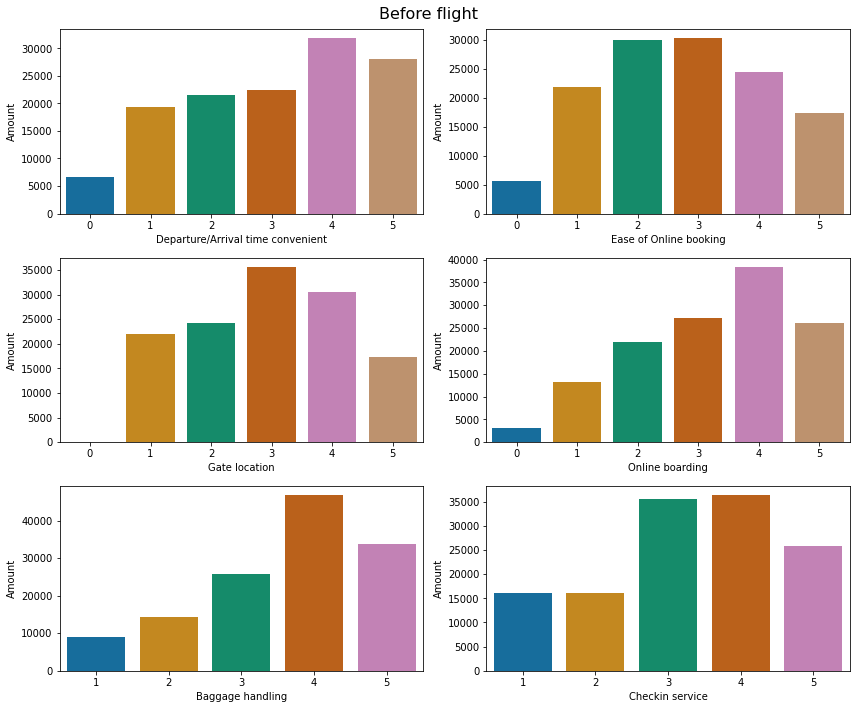

In [59]:
plt.figure(figsize=(12,10))
plt.suptitle('Before flight', fontsize=16)

plt.subplot(321)
sns.countplot(x=df['Departure/Arrival time convenient'], palette="colorblind")
plt.xlabel('Departure/Arrival time convenient')
plt.ylabel('Amount')

plt.subplot(322)
sns.countplot(x=df['Ease of Online booking'], palette="colorblind")
plt.xlabel('Ease of Online booking')
plt.ylabel('Amount')

plt.subplot(323)
sns.countplot(x=df['Gate location'], palette="colorblind")
plt.xlabel('Gate location')
plt.ylabel('Amount')

plt.subplot(324)
sns.countplot(x=df['Online boarding'], palette="colorblind")
plt.xlabel('Online boarding')
plt.ylabel('Amount')

plt.subplot(325)
sns.countplot(x=df['Baggage handling'], palette="colorblind")
plt.xlabel('Baggage handling')
plt.ylabel('Amount')

plt.subplot(326)
sns.countplot(x=df['Checkin service'], palette="colorblind")
plt.xlabel('Checkin service')
plt.ylabel('Amount')

plt.tight_layout()

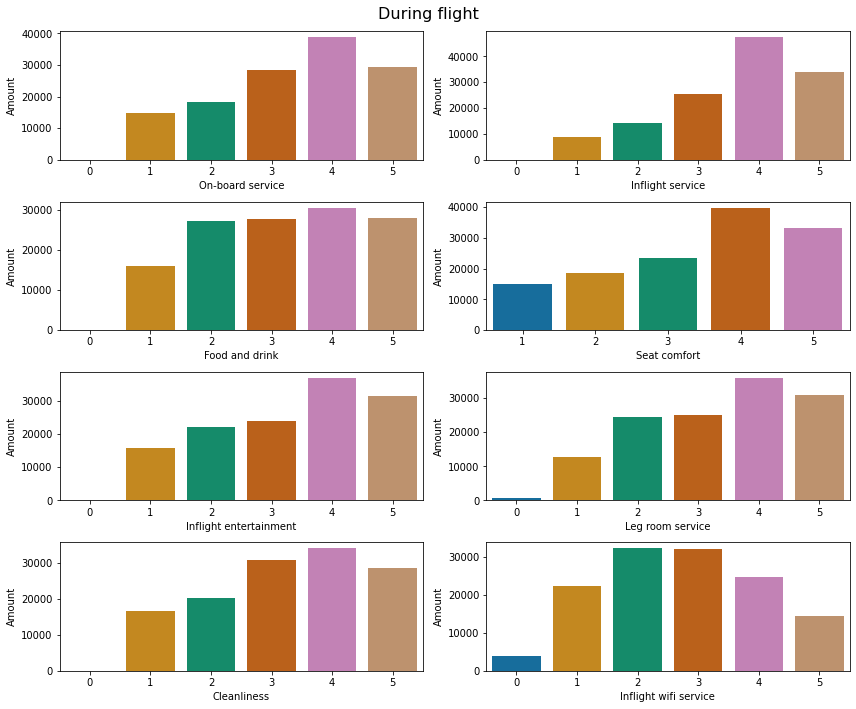

In [60]:
plt.figure(figsize=(12,10))
plt.suptitle('During flight', fontsize=16)

plt.subplot(421)
sns.countplot(x=df['On-board service'], palette="colorblind")
plt.xlabel('On-board service')
plt.ylabel('Amount')

plt.subplot(422)
sns.countplot(x=df['Inflight service'], palette="colorblind")
plt.xlabel('Inflight service')
plt.ylabel('Amount')

plt.subplot(423)
sns.countplot(x=df['Food and drink'], palette="colorblind")
plt.xlabel('Food and drink')
plt.ylabel('Amount')

plt.subplot(424)
sns.countplot(x=df['Seat comfort'], palette="colorblind")
plt.xlabel('Seat comfort')
plt.ylabel('Amount')

plt.subplot(425)
sns.countplot(x=df['Inflight entertainment'], palette="colorblind")
plt.xlabel('Inflight entertainment')
plt.ylabel('Amount')

plt.subplot(426)
sns.countplot(x=df['Leg room service'], palette="colorblind")
plt.xlabel('Leg room service')
plt.ylabel('Amount')

plt.subplot(427)
sns.countplot(x=df['Cleanliness'], palette="colorblind")
plt.xlabel('Cleanliness')
plt.ylabel('Amount')

plt.subplot(428)
sns.countplot(x=df['Inflight wifi service'], palette="colorblind")
plt.xlabel('Inflight wifi service')
plt.ylabel('Amount')

plt.tight_layout()


The last part will be to find out what effects the customers satisfaction the most - in other words, what have the strongest correlation with satisfaction. Because the data set contain several categorical variables, it is neccesary to transform them into numerical variables first

In [61]:
cat_dtype = df.select_dtypes(include="object").columns
cat_dtype

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')

In [62]:
num_dtype = df.select_dtypes(include="number").columns
num_dtype

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [63]:
le= LabelEncoder()
df["Gender"]= le.fit_transform(df["Gender"])
df["Customer Type"]= le.fit_transform(df["Customer Type"])
df["Type of Travel"]= le.fit_transform(df["Type of Travel"])
df["Class"]= le.fit_transform(df["Class"])
df["Satisfaction"]= le.fit_transform(df["Satisfaction"])

df.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1


In [64]:
corr_matrix = df.corr()
corr_matrix.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
Gender,1.000000,-0.030978,0.009006,0.009503,-0.011587,0.003610,0.005900,0.009000,0.005898,-0.000845,0.001713,-0.045023,-0.030780,0.003843,0.006447,0.031053,0.036344,0.008444,0.038492,0.002844,0.003532,0.001332,0.011236
Customer Type,-0.030978,1.000000,-0.284163,-0.308234,0.042981,-0.226025,-0.005769,-0.206884,-0.018068,0.004483,-0.057014,-0.189094,-0.156262,-0.106010,-0.054179,-0.046826,0.024853,-0.031250,0.023294,-0.081324,0.003884,0.004797,-0.186011
Age,0.009006,-0.284163,1.000000,-0.044811,-0.116916,0.099461,0.016121,0.036962,0.022568,-0.000407,0.023202,0.207576,0.159150,0.074949,0.057080,0.039113,-0.047982,0.033481,-0.051346,0.052576,-0.009055,-0.011223,0.134089


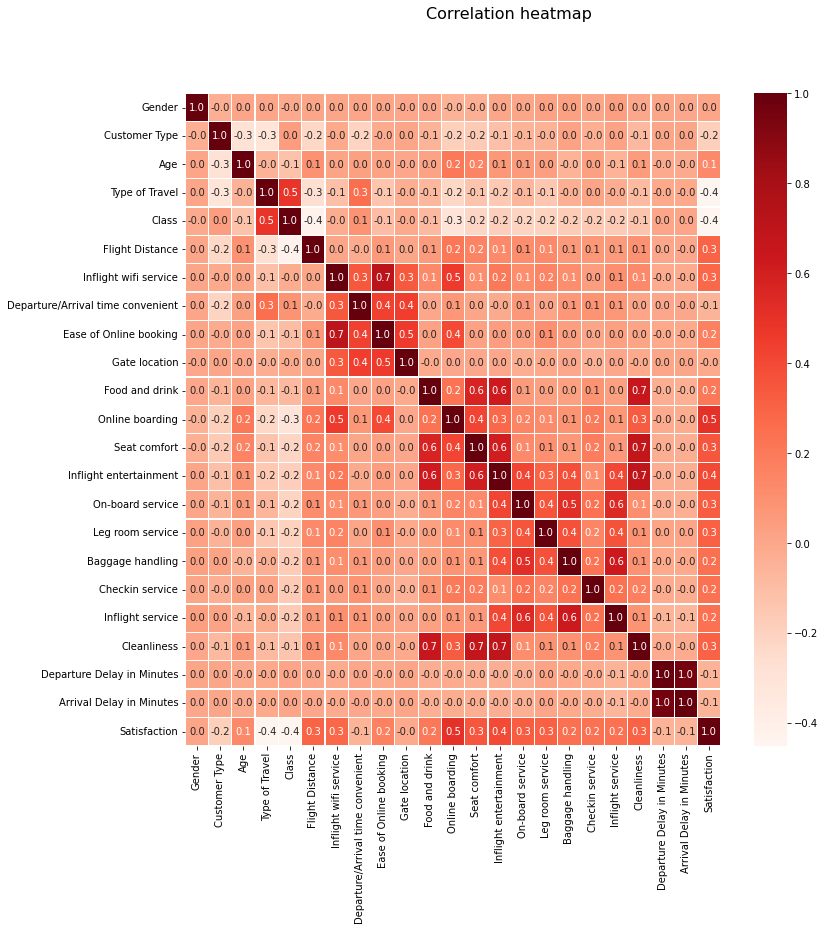

In [65]:
plt.figure(figsize=(12,12))
plt.suptitle('Correlation heatmap', fontsize=16)
sns.heatmap(corr_matrix, annot=True, cmap="Reds",linewidth=.2, fmt=".1f")
plt.show()

There is no significant correlation between Satisfaction and other columns.

I will take a closer look at relation between Departure delay and customers Satisfaction. I created two categories for delay - Yes and No, and I set the limit for 15minutes to filter out small delays

In [86]:
satisfaction_group = pd.concat([survey_train, survey_test])
satisfaction_group['Departure Delay in Minutes'] = np.where(satisfaction_group['Departure Delay in Minutes'] <= 15, "No", "Yes")
satisfaction_group.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,Yes,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,No,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,No,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,No,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,No,0.0,satisfied


In [87]:
satisfaction_group['Departure Delay in Minutes'].value_counts()

No     101143
Yes     28737
Name: Departure Delay in Minutes, dtype: int64

There is 22% chance, that the airplane will have delay larger than 15 minutes

In [88]:
crosstb1 = pd.crosstab(satisfaction_group['Departure Delay in Minutes'], satisfaction_group["satisfaction"])
crosstb1

satisfaction,neutral or dissatisfied,satisfied
Departure Delay in Minutes,,
No,55344,45799
Yes,18108,10629


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='count'>

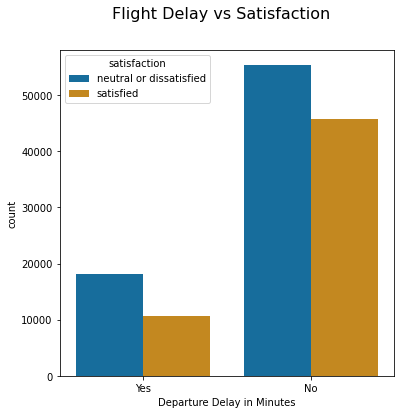

In [89]:
plt.figure(figsize=(6,6))
plt.suptitle('Flight Delay vs Satisfaction', fontsize=16)

sns.countplot(data=satisfaction_group, x="Departure Delay in Minutes", hue="satisfaction",  palette="colorblind")